In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1. Importing packages
import pandas as pd
import os
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"onimashah","key":"e78a89d2676b9cdd0593f233ccbbea49"}'}

In [ ]:
#Importing Kaggle API

#Creating Kaggle folder
! mkdir -p ~/.kaggle
#Copying kaggle.json to Kaggle folder
! cp kaggle.json ~/.kaggle
#Permission for json to act
! chmod 600 ~/.kaggle/kaggle.json
#List all datasets in Kaggle
! kaggle datasets list
#Connecting dataset from Kaggle to Google Colab
! kaggle datasets download dgomonov/new-york-city-airbnb-open-data
#Unzip the file
! unzip new-york-city-airbnb-open-data.zip

ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          18219        620  1.0              
jaderz/hospital-beds-management                                 Hospital Beds Management                                47583  2025-10-03 09:21:58.590000          15373        357  1.0              
ahmadrazakashif/bmw-worldwide-sales-records-20102024            BMW Worldwide Sales Records (2010–2024)                853348  2025-09-20 14:39:45.280000          20174        395  1.0              
umutt

In [ ]:
#Checking dataset
airbnb_initial = pd.read_csv('AB_NYC_2019.csv')
print("Number of lines of data in the dataset: ", len(airbnb_initial))
print("Number of columns in the dataset: ", len(airbnb_initial.columns))
print(airbnb_initial.columns)
print(airbnb_initial.dtypes)
airbnb_initial.head(10)

Number of lines of data in the dataset:  48895
Number of columns in the dataset:  16
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
#2. Cleaning the dataset

#Check for missing values
airbnb_initial.isnull().sum()

#Removing rows with missing information
airbnb_initial = airbnb_initial.dropna(subset=['name', 'host_name', 'last_review', 'reviews_per_month'])

In [ ]:
#Determining which columns are not relevant
airbnb_initial = airbnb_initial.drop(['id', 'host_name'], axis=1)

In [ ]:
#Removing any duplicates
before = len(airbnb_initial)
airbnb_initial = airbnb_initial.drop_duplicates()
after = len(airbnb_initial)
removed = before - after
print(f"Number of duplicates removed: {removed}")

Number of duplicates removed: 0


In [ ]:
#Converting price and last_review types
airbnb_initial['price'] = airbnb_initial['price'].astype(float)
airbnb_initial['last_review'] = airbnb_initial['last_review'].astype('datetime64[ns]')

#Number of rows before filter
rows_before = airbnb_initial.shape[0]

#Removing listings with zero or negative values
airbnb_initial = airbnb_initial[airbnb_initial['price'] > 0]
airbnb_initial = airbnb_initial[airbnb_initial['minimum_nights'] > 0]
airbnb_initial = airbnb_initial[airbnb_initial['number_of_reviews'] > 0]
airbnb_initial = airbnb_initial[airbnb_initial['reviews_per_month'] > 0]
airbnb_initial = airbnb_initial[airbnb_initial['availability_365'] > 0]

#Number of rows after filter
rows_after = airbnb_initial.shape[0]
rows_removed = rows_before - rows_after

print(f"Rows before cleaning: {rows_before}")
print(f"Rows after cleaning: {rows_after}")
print(f"Total listings removed: {rows_removed}")

Rows before cleaning: 38821
Rows after cleaning: 26138
Total listings removed: 12683


In [ ]:
#Removing outliers using IQR

#Number of rows before filter
rows_before = airbnb_initial.shape[0]

#Maximum values of price and minimum nights before filter
max_price = airbnb_initial['price'].max()
max_min_nights = airbnb_initial['minimum_nights'].max()

print(f"Max price: {max_price}")
print(f"Max minimum_nights: {max_min_nights}")

#Removing outliers for price
Q1_price = airbnb_initial['price'].quantile(0.25)
Q3_price = airbnb_initial['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_price = Q3_price + 1.5 * IQR_price

#Removing outliers for minimum nights
Q1_nights = airbnb_initial['minimum_nights'].quantile(0.25)
Q3_nights = airbnb_initial['minimum_nights'].quantile(0.75)
IQR_nights = Q3_nights - Q1_nights
upper_nights = Q3_nights + 1.5 * IQR_nights

airbnb_initial = airbnb_initial[airbnb_initial['price'] <= upper_price]
airbnb_initial = airbnb_initial[airbnb_initial['minimum_nights'] <= upper_nights]

#Number of rows after filter
rows_after = airbnb_initial.shape[0]
rows_removed = rows_before - rows_after

print("After filtering:")
print(f"Max price: {airbnb_initial['price'].max()}")
print(f"Max minimum_nights: {airbnb_initial['minimum_nights'].max()}")
print(f"Rows after filtering: {rows_after}")
print(f"Total rows removed: {rows_removed}")

Max price: 9999.0
Max minimum_nights: 1250
After filtering:
Max price: 330.0
Max minimum_nights: 8
Rows after filtering: 21127
Total rows removed: 5011


In [ ]:
#Checking for number of unique values in 'neighbourhood'
airbnb_initial['neighbourhood'].nunique()

216

In [ ]:
#Checking for unique values in the 'neighbourhood' column
airbnb_initial['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Clinton Hill', 'Murray Hill',
       "Hell's Kitchen", 'Chinatown', 'Upper West Side', 'South Slope',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Bedford-Stuyvesant', 'Windsor Terrace', 'Inwood',
       'Harlem', 'Greenpoint', 'Bushwick', 'Lower East Side',
       'East Village', 'Long Island City', 'Kips Bay', 'Upper East Side',
       'East Harlem', 'Washington Heights', 'Flatbush',
       'Prospect Heights', 'Carroll Gardens', 'Prospect-Lefferts Gardens',
       'Flatlands', 'Flushing', 'West Village', 'DUMBO', 'St. George',
       'Highbridge', 'Morningside Heights', 'Jamaica', 'Ridgewood',
       'Middle Village', 'NoHo', 'Ditmars Steinway', 'Cobble Hill',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'East Flatbush', 'Tompkinsville', 'Astoria', 'Eastchester',
       'Gowanus', 'Brooklyn Heights', 'Two Bridges', 'Forest Hills',
       'Boerum Hill', 'Nolita', 'Woodlawn', 'SoH

In [ ]:
#Standardizing text columns and ensuring they are consistent
airbnb_initial['neighbourhood_group'] = airbnb_initial['neighbourhood_group'].str.strip().str.title()
airbnb_initial['neighbourhood'] = airbnb_initial['neighbourhood'].str.strip().str.title()
airbnb_initial['room_type'] = airbnb_initial['room_type'].str.strip().str.title()

#Fixing inconsistent capitalization in neighborhood names
airbnb_initial['neighbourhood'] = airbnb_initial['neighbourhood'].replace("Hell'S Kitchen", "Hell's Kitchen")
airbnb_initial['neighbourhood'] = airbnb_initial['neighbourhood'].replace("Bull'S Head", "Bull's Head")
airbnb_initial['neighbourhood'] = airbnb_initial['neighbourhood'].replace("Prince'S Bay", "Prince's Bay")

In [ ]:
#Checking the cleaned dataset
print("Cleaned dataset shape:", airbnb_initial.shape)
print(airbnb_initial.head())

Cleaned dataset shape: (21127, 14)
                                        name  host_id neighbourhood_group  \
0         Clean & quiet apt home by the park     2787            Brooklyn   
1                      Skylit Midtown Castle     2845           Manhattan   
3            Cozy Entire Floor of Brownstone     4869            Brooklyn   
5  Large Cozy 1 BR Apartment In Midtown East     7322           Manhattan   
7           Large Furnished Room Near B'way      8967           Manhattan   

    neighbourhood  latitude  longitude        room_type  price  \
0      Kensington  40.64749  -73.97237     Private Room  149.0   
1         Midtown  40.75362  -73.98377  Entire Home/Apt  225.0   
3    Clinton Hill  40.68514  -73.95976  Entire Home/Apt   89.0   
5     Murray Hill  40.74767  -73.97500  Entire Home/Apt  200.0   
7  Hell's Kitchen  40.76489  -73.98493     Private Room   79.0   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                 

In [ ]:
#Saving cleaned data to a new file for the following step
airbnb_initial.to_csv('cleaned_airbnb.csv', index=False)

In [ ]:
#Final check: Data types and nulls after full cleaning
airbnb_initial = pd.read_csv('cleaned_airbnb.csv')
airbnb_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21127 entries, 0 to 21126
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            21127 non-null  object 
 1   host_id                         21127 non-null  int64  
 2   neighbourhood_group             21127 non-null  object 
 3   neighbourhood                   21127 non-null  object 
 4   latitude                        21127 non-null  float64
 5   longitude                       21127 non-null  float64
 6   room_type                       21127 non-null  object 
 7   price                           21127 non-null  float64
 8   minimum_nights                  21127 non-null  int64  
 9   number_of_reviews               21127 non-null  int64  
 10  last_review                     21127 non-null  object 
 11  reviews_per_month               21127 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
#3. Uploading the NYC Property Sales dataset
from google.colab import files
uploaded = files.upload()
import pandas as pd
#Loading dataset
sales_df = pd.read_csv('nyc-rolling-sales.csv')

Saving nyc-rolling-sales.csv to nyc-rolling-sales.csv


In [ ]:
#Checking columns
print("Columns in property sales dataset:", sales_df.columns)

#Keeping only BOROUGH and SALE PRICE columns
sales_df = sales_df[['BOROUGH', 'SALE PRICE']]

#Checking the first few rows
print(sales_df.head())

#Converting 'SALE PRICE' column to string so we can clean it
sales_df['SALE PRICE'] = sales_df['SALE PRICE'].astype(str)

#Removing commas, dollar signs, and dashes from SALE PRICE
sales_df['SALE PRICE'] = sales_df['SALE PRICE'].str.replace(',', '')
sales_df['SALE PRICE'] = sales_df['SALE PRICE'].str.replace('$', '')
sales_df['SALE PRICE'] = sales_df['SALE PRICE'].str.replace('-', '')
sales_df['SALE PRICE'] = sales_df['SALE PRICE'].str.strip()

#Dropping rows where SALE PRICE is blank
sales_df = sales_df[sales_df['SALE PRICE'] != '']

#Convert SALE PRICE to float
sales_df['SALE PRICE'] = sales_df['SALE PRICE'].astype(float)

#Removing rows with missing or zero sale prices
sales_df = sales_df.dropna()
sales_df = sales_df[sales_df['SALE PRICE'] > 0]

#Checking the cleaned dataset
print("Cleaned property sales dataset:")
print(sales_df.head())

Columns in property sales dataset: Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')
   BOROUGH SALE PRICE
0        1    6625000
1        1        -  
2        1        -  
3        1    3936272
4        1    8000000
Cleaned property sales dataset:
   BOROUGH  SALE PRICE
0        1   6625000.0
3        1   3936272.0
4        1   8000000.0
6        1   3192840.0
9        1  16232000.0


In [ ]:
#4. Preparing Sales Data for merge.
#Mapping BOROUGH numbers to borough names so they match our Airbnb dataset
sales_df['neighbourhood_group'] = sales_df['BOROUGH']
sales_df['neighbourhood_group'] = sales_df['neighbourhood_group'].replace({
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
})

#list of borough names to use in our loop
borough_names = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
avg_prices = []  # This empty list will store the average sale prices

#the update
print("Updated property sales dataset with borough names:")
print(sales_df.head())

Updated property sales dataset with borough names:
   BOROUGH  SALE PRICE neighbourhood_group
0        1   6625000.0           Manhattan
3        1   3936272.0           Manhattan
4        1   8000000.0           Manhattan
6        1   3192840.0           Manhattan
9        1  16232000.0           Manhattan


In [ ]:
#Looping each borough to calc its avg sale price
for b in borough_names:
    # Filter the dataset to just this borough
    borough_data = sales_df[sales_df['neighbourhood_group'] == b]

    # Calculate the avg SALE PRICE for this borough
    avg_price = borough_data['SALE PRICE'].mean()

    # Append result to our list
    avg_prices.append(avg_price)

#Creating DataFrame for results
avg_sales_df = pd.DataFrame({
    'neighbourhood_group': borough_names,
    'avg_sale_price': avg_prices
})

#Previewing average sale prices by borough
print("Average property sale prices by borough:")
print(avg_sales_df)

Average property sale prices by borough:
  neighbourhood_group  avg_sale_price
0           Manhattan    3.337951e+06
1               Bronx    8.034521e+05
2            Brooklyn    1.278964e+06
3              Queens    7.399086e+05
4       Staten Island    5.434721e+05


In [ ]:
airbnb_df = pd.read_csv('cleaned_airbnb.csv')

#merge with avg_sales_df on neighbourhood_group
merged_df = pd.merge(airbnb_df, avg_sales_df, on='neighbourhood_group', how='left')

# Checking
print("Merged dataset with average sale prices:")
print(merged_df[['neighbourhood_group', 'price', 'avg_sale_price']].head())

Merged dataset with average sale prices:
  neighbourhood_group  price  avg_sale_price
0            Brooklyn  149.0    1.278964e+06
1           Manhattan  225.0    3.337951e+06
2            Brooklyn   89.0    1.278964e+06
3           Manhattan  200.0    3.337951e+06
4           Manhattan   79.0    3.337951e+06


In [ ]:
#Making sure the merged dataset has no missing values, correct data types
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21127 entries, 0 to 21126
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            21127 non-null  object 
 1   host_id                         21127 non-null  int64  
 2   neighbourhood_group             21127 non-null  object 
 3   neighbourhood                   21127 non-null  object 
 4   latitude                        21127 non-null  float64
 5   longitude                       21127 non-null  float64
 6   room_type                       21127 non-null  object 
 7   price                           21127 non-null  float64
 8   minimum_nights                  21127 non-null  int64  
 9   number_of_reviews               21127 non-null  int64  
 10  last_review                     21127 non-null  object 
 11  reviews_per_month               21127 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
#5. Statistical Analysis (merged_df)
#Count(s)
print("Number of rows:", merged_df.shape[0])
print("Number of columns:", merged_df.shape[1])


Number of rows: 21127
Number of columns: 15


In [ ]:
#Just focusing on price and avg_sale_price from the merged dataset
print("Basic stats for Airbnb price and average sale price:")
print(merged_df[['price', 'avg_sale_price']].describe())

Basic stats for Airbnb price and average sale price:
              price  avg_sale_price
count  21127.000000    2.112700e+04
mean     120.142188    1.930967e+06
std       68.090467    1.096629e+06
min       10.000000    5.434721e+05
25%       66.000000    1.278964e+06
50%      100.000000    1.278964e+06
75%      159.000000    3.337951e+06
max      330.000000    3.337951e+06


In [ ]:
#Range (max - min)
print("Range:")
print("Airbnb price range:", merged_df['price'].max() - merged_df['price'].min())
print("Avg sale price range:", merged_df['avg_sale_price'].max() - merged_df['avg_sale_price'].min())

Range:
Airbnb price range: 320.0
Avg sale price range: 2794479.160496589


In [ ]:
#Standard deviation
print("\nStandard Deviation:")
print("Price std:", merged_df['price'].std())
print("Avg sale price std:", merged_df['avg_sale_price'].std())


Standard Deviation:
Price std: 68.09046699044711
Avg sale price std: 1096629.2898785847


In [ ]:
# Removing outliers using IQR (Interquartile Range)
# We'll focus on 'price' and 'avg_sale_price'

# Number of rows before removing outliers
rows_before = merged_df.shape[0]

# Price outliers
Q1_price = merged_df['price'].quantile(0.25)
Q3_price = merged_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_price = Q3_price + 1.5 * IQR_price

# Avg sale price outliers
Q1_sale = merged_df['avg_sale_price'].quantile(0.25)
Q3_sale = merged_df['avg_sale_price'].quantile(0.75)
IQR_sale = Q3_sale - Q1_sale
upper_sale = Q3_sale + 1.5 * IQR_sale

# Filter the dataset
merged_df = merged_df[(merged_df['price'] <= upper_price) &
                      (merged_df['avg_sale_price'] <= upper_sale)]

# Number of rows after removing outliers
rows_after = merged_df.shape[0]
rows_removed = rows_before - rows_after

print(f"Rows removed due to outliers: {rows_removed}")
print(f"New dataset size: {rows_after} rows")

Rows removed due to outliers: 528
New dataset size: 20599 rows


In [ ]:
#Correlation analysis
print("Correlation between Airbnb price and average property sale price:")
correlation = merged_df[['price', 'avg_sale_price']].corr()
print(correlation)

Correlation between Airbnb price and average property sale price:
                   price  avg_sale_price
price           1.000000        0.321517
avg_sale_price  0.321517        1.000000


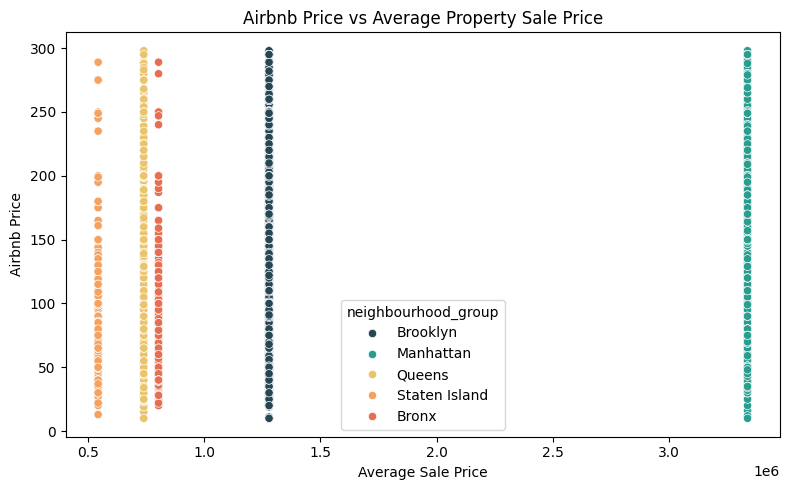

In [ ]:
#6. Visualizations
#Scatter Plot – Airbnb Price vs Average Property Sale Price
#This plot helps us see if there's any real connection between how much people charge for Airbnbs
#and how expensive properties are in the same area.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='avg_sale_price', y='price', hue='neighbourhood_group',
                palette=['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])
plt.title('Airbnb Price vs Average Property Sale Price')
plt.xlabel('Average Sale Price')
plt.ylabel('Airbnb Price')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1147651612.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='neighbourhood_group', y='price',


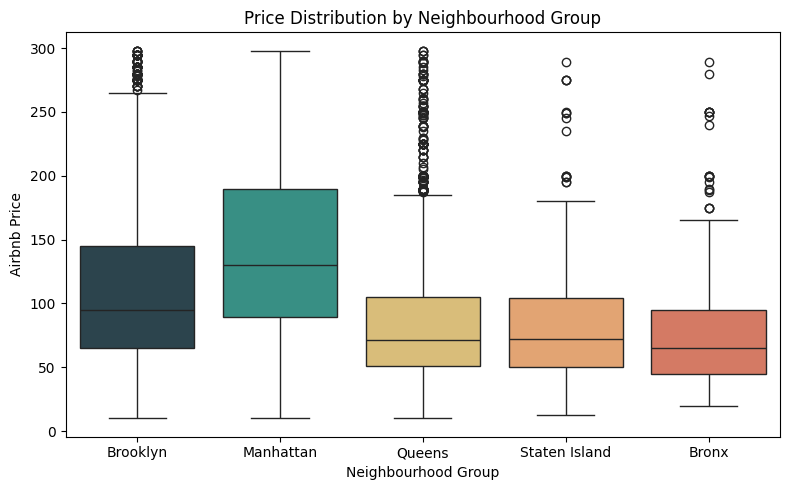

In [ ]:
#Boxplot – Price Distribution by Borough
#This shows how Airbnb prices vary across different boroughs.
#It helps spot which areas have more expensive listings or more variability.
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='neighbourhood_group', y='price',
            palette=['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Airbnb Price')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2905319272.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_by_borough, x='neighbourhood_group', y='price',


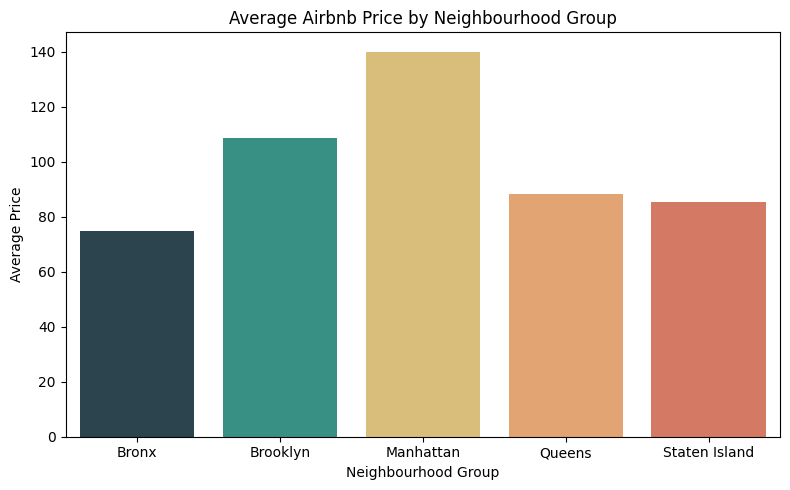

In [ ]:
#Bar Plot – Average Price by Borough
#This gives a quick look at the average Airbnb price in each borough.

avg_by_borough = merged_df.groupby('neighbourhood_group')['price'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_by_borough, x='neighbourhood_group', y='price',
            palette=['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])
plt.title('Average Airbnb Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In [ ]:
#5. Airbnb Statistical Analysis
#Basic Statistics
print("Basic Statistics:")
print(airbnb_initial.describe())

Basic Statistics:
            host_id      latitude     longitude         price  minimum_nights  \
count  2.112700e+04  21127.000000  21127.000000  21127.000000    21127.000000   
mean   7.660882e+07     40.725869    -73.943913    120.142188        2.490936   
std    8.308468e+07      0.059015      0.053754     68.090467        1.544322   
min    2.787000e+03     40.506410    -74.244420     10.000000        1.000000   
25%    7.833993e+06     40.685230    -73.979590     66.000000        1.000000   
50%    3.838802e+07     40.718380    -73.949860    100.000000        2.000000   
75%    1.350606e+08     40.763010    -73.925145    159.000000        3.000000   
max    2.738417e+08     40.913060    -73.712990    330.000000        8.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       21127.000000       21127.000000                    21127.000000   
mean           43.232025           2.041764                        4.509206   
std            

In [ ]:
#Calculating ranges for selected variables
print("Price Range:", airbnb_initial['price'].max() - airbnb_initial['price'].min())
print("Minimum Nights Range:", airbnb_initial['minimum_nights'].max() - airbnb_initial['minimum_nights'].min())
print("Reviews per Month Range:", airbnb_initial['reviews_per_month'].max() - airbnb_initial['reviews_per_month'].min())
print("Availability 365 Range:", airbnb_initial['availability_365'].max() - airbnb_initial['availability_365'].min())

Price Range: 320.0
Minimum Nights Range: 7
Reviews per Month Range: 58.49
Availability 365 Range: 364


In [ ]:
#Value Counts for Categorical Variables
print("Room Type Distribution:")
print(airbnb_initial['room_type'].value_counts())

print("\nNeighbourhood Group Distribution:")
print(airbnb_initial['neighbourhood_group'].value_counts())

print("\nNeighbourhood Distribution (Top 10):")
print(airbnb_initial['neighbourhood'].value_counts().head(10))

Room Type Distribution:
room_type
Private Room       10536
Entire Home/Apt    10004
Shared Room          587
Name: count, dtype: int64

Neighbourhood Group Distribution:
neighbourhood_group
Brooklyn         9042
Manhattan        7813
Queens           3295
Bronx             703
Staten Island     274
Name: count, dtype: int64

Neighbourhood Distribution (Top 10):
neighbourhood
Bedford-Stuyvesant    1903
Williamsburg          1474
Harlem                1292
Bushwick              1062
Hell's Kitchen         876
Crown Heights          684
East Village           644
East Harlem            576
Upper East Side        572
Upper West Side        538
Name: count, dtype: int64


In [ ]:
#Correlation of 'price' with other numeric variables
numeric_cols = airbnb_initial.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

print("\nCorrelation with Price:")
print(correlation_matrix['price'].sort_values(ascending=False))


Correlation with Price:
price                             1.000000
calculated_host_listings_count    0.119187
minimum_nights                    0.111826
latitude                          0.040203
availability_365                 -0.001625
host_id                          -0.036303
number_of_reviews                -0.039752
reviews_per_month                -0.069274
longitude                        -0.293690
Name: price, dtype: float64


In [ ]:
#OLS Regression Model
import statsmodels.api as sm

#Linear regression model (OLS)
X = airbnb_initial[['calculated_host_listings_count', 'minimum_nights', 'longitude']]
X = sm.add_constant(X)
Y = airbnb_initial['price']

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     796.0
Date:                Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                        23:50:07   Log-Likelihood:            -1.1802e+05
No. Observations:               21127   AIC:                         2.360e+05
Df Residuals:                   21123   BIC:                         2.361e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

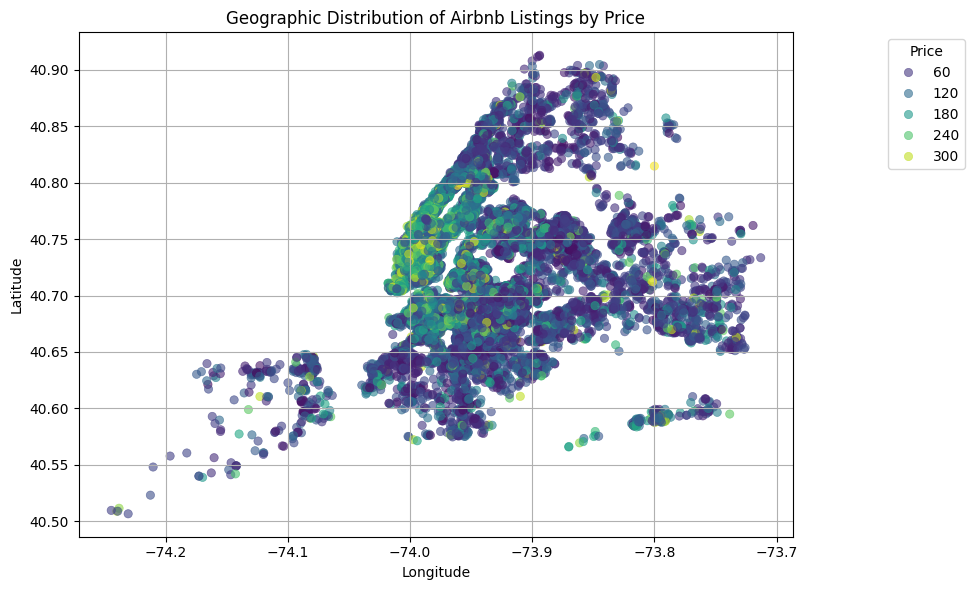

In [ ]:
#Airbnb Visualizations
#Geographic Scatter Plot: Price by Location

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=airbnb_initial,
    x='longitude',
    y='latitude',
    hue='price',
    palette='viridis',
    alpha=0.6,
    edgecolor=None
)
plt.title('Geographic Distribution of Airbnb Listings by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

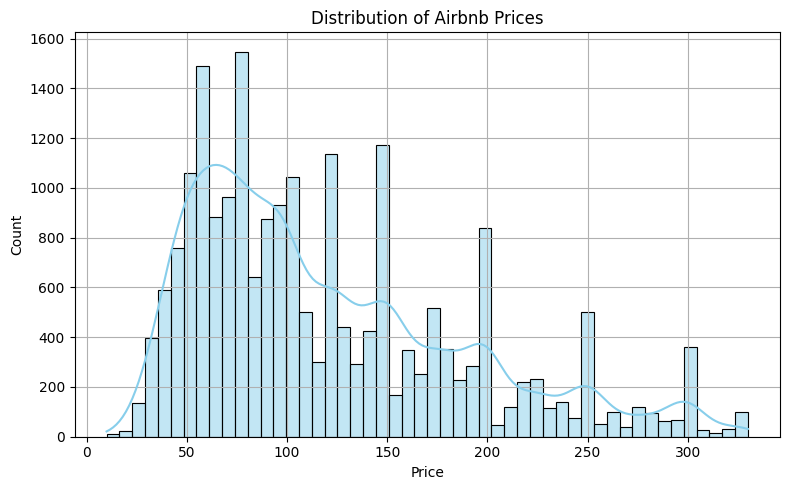

In [ ]:
#Histogram of Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(
    airbnb_initial['price'],
    bins=50,
    kde=True,
    color='skyblue'
)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3599653118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


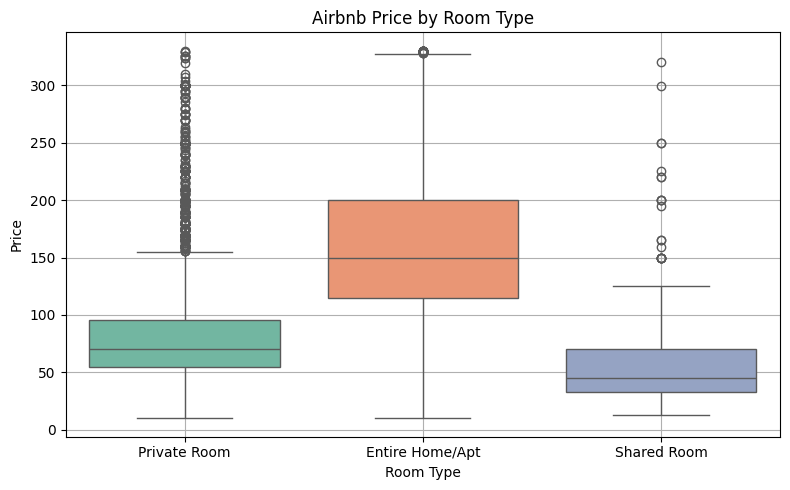

In [ ]:
#Boxplot: Price by Room Type
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=airbnb_initial,
    x='room_type',
    y='price',
    palette='Set2'
)
plt.title('Airbnb Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

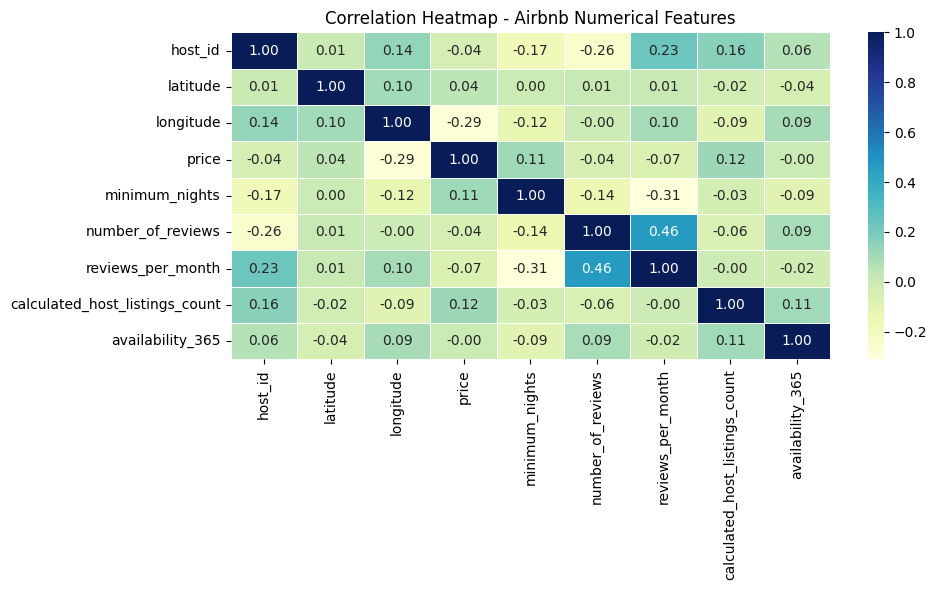

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    airbnb_initial.select_dtypes(include=['float64', 'int64']).corr(),
    annot=True,
    cmap='YlGnBu',
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Heatmap - Airbnb Numerical Features')
plt.tight_layout()
plt.show()

#This heatmap displays how numerical features relate to each other. Price has a weak negative correlation with longitude.

<>:34: SyntaxWarning: invalid escape sequence '\I'
<>:34: SyntaxWarning: invalid escape sequence '\I'
/tmp/ipython-input-64589867.py:34: SyntaxWarning: invalid escape sequence '\I'
  print("n\Intercept:", model.intercept_)


Regression Performance:
R-squared: 0.11353859001970967
Mean Absolute Error: 47.547981580803615
Root Mean Squared Error: 59.009537543849504

Regression Coefficients:
             Feature  Coefficient
0     avg_sale_price     0.000018
1     minimum_nights     3.223694
2  number_of_reviews    -0.002100
3  reviews_per_month    -1.186475
4   availability_365     0.011028
n\Intercept: 73.00042240460206


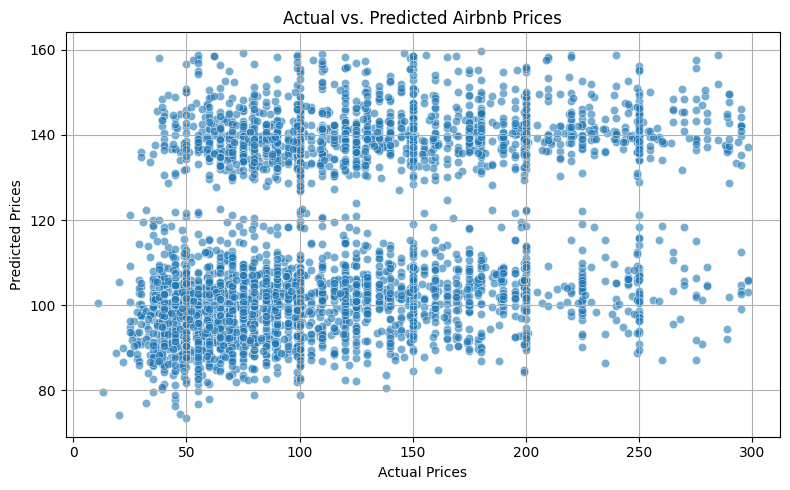

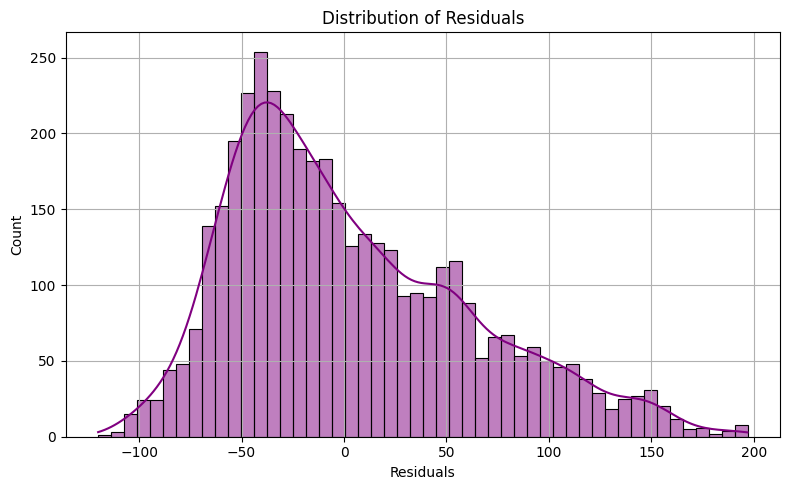

In [ ]:
#Airbnb Price vs. Average Property Sale Price and other factors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

#Selecting features and target
features = ['avg_sale_price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']
target = 'price'

#Dropping any remaining missing values
regression_df = merged_df.dropna(subset=features + [target])

#Splitting into train and test sets
X = regression_df[features]
y = regression_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Predicting
y_pred = model.predict(X_test)

#Evaluating the model
print("Regression Performance:")
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

#Coefficient and intercept
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coefficients)
print("n\Intercept:", model.intercept_)

#Visualizing actual vs. predicted prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Airbnb Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

#Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()
